In [ ]:
# !pip install plotly_express

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

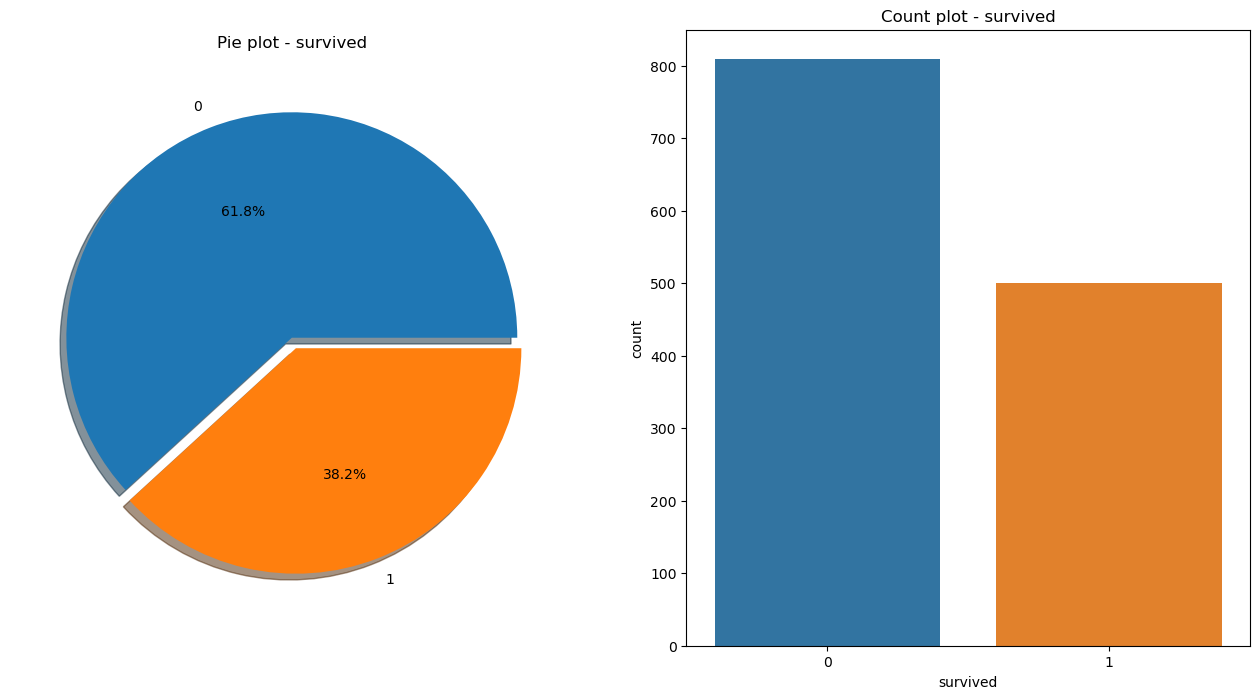

In [21]:
f, ax = plt.subplots(1,2,figsize=(16,8))

titanic['survived'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',shadow=True,explode=[0,0.05])
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=titanic,ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

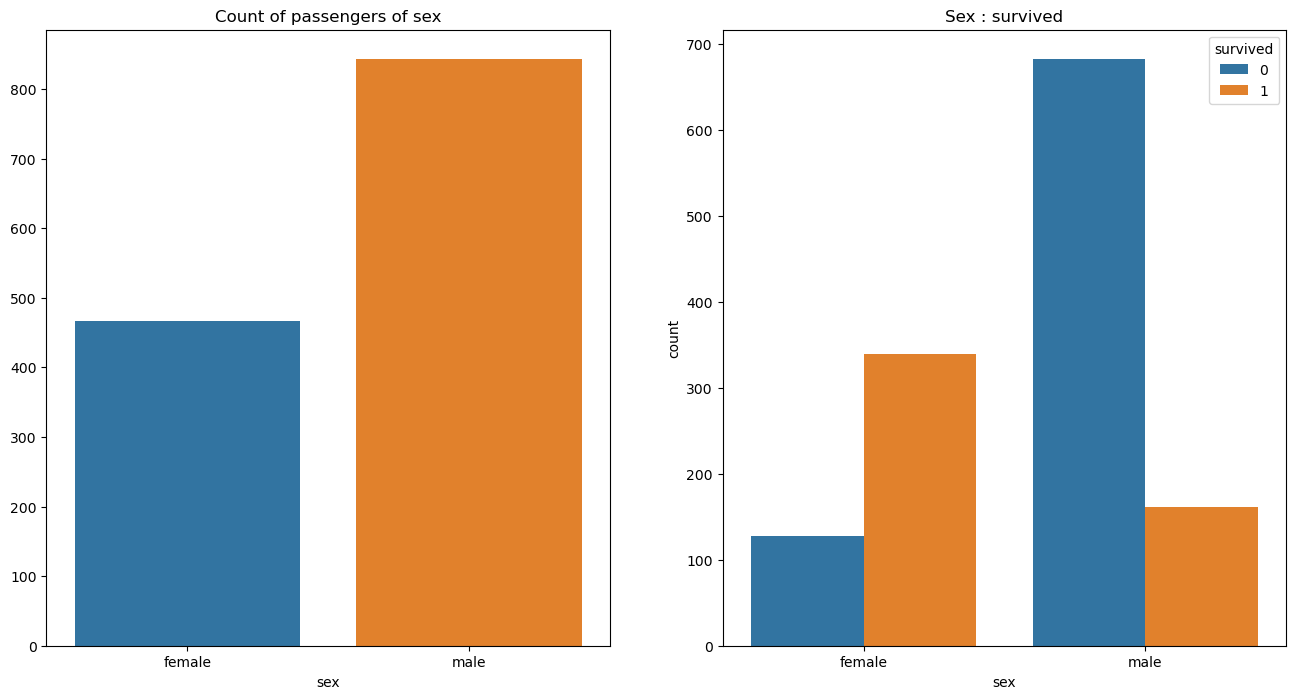

In [23]:
f, ax = plt.subplots(1,2,figsize=(16,8))

sns.countplot(x='sex',data=titanic,ax=ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex',data=titanic, hue='survived' ,ax=ax[1])
ax[1].set_title('Sex : survived')

plt.show()

In [7]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


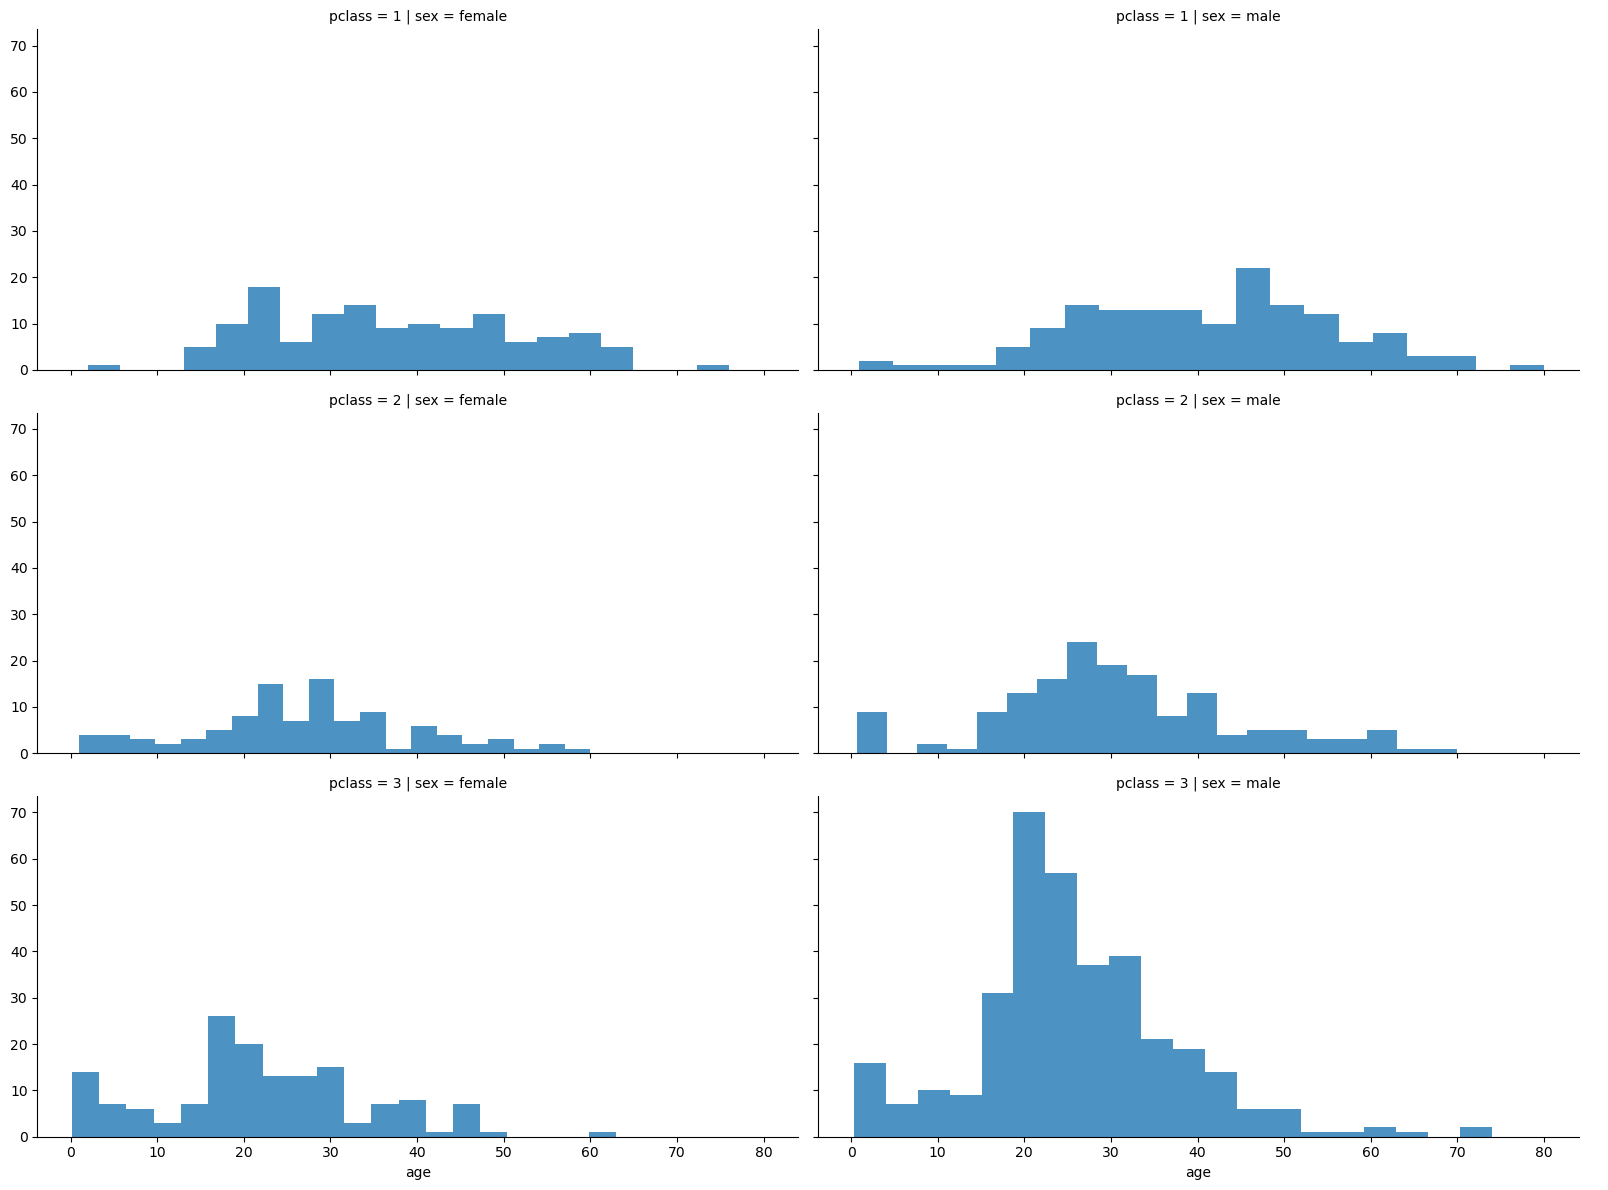

In [8]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist,'age',alpha=0.8,bins=20)
grid.add_legend()

In [9]:
import plotly.express as px

In [10]:
fig = px.histogram(titanic,x='age')
fig.show()

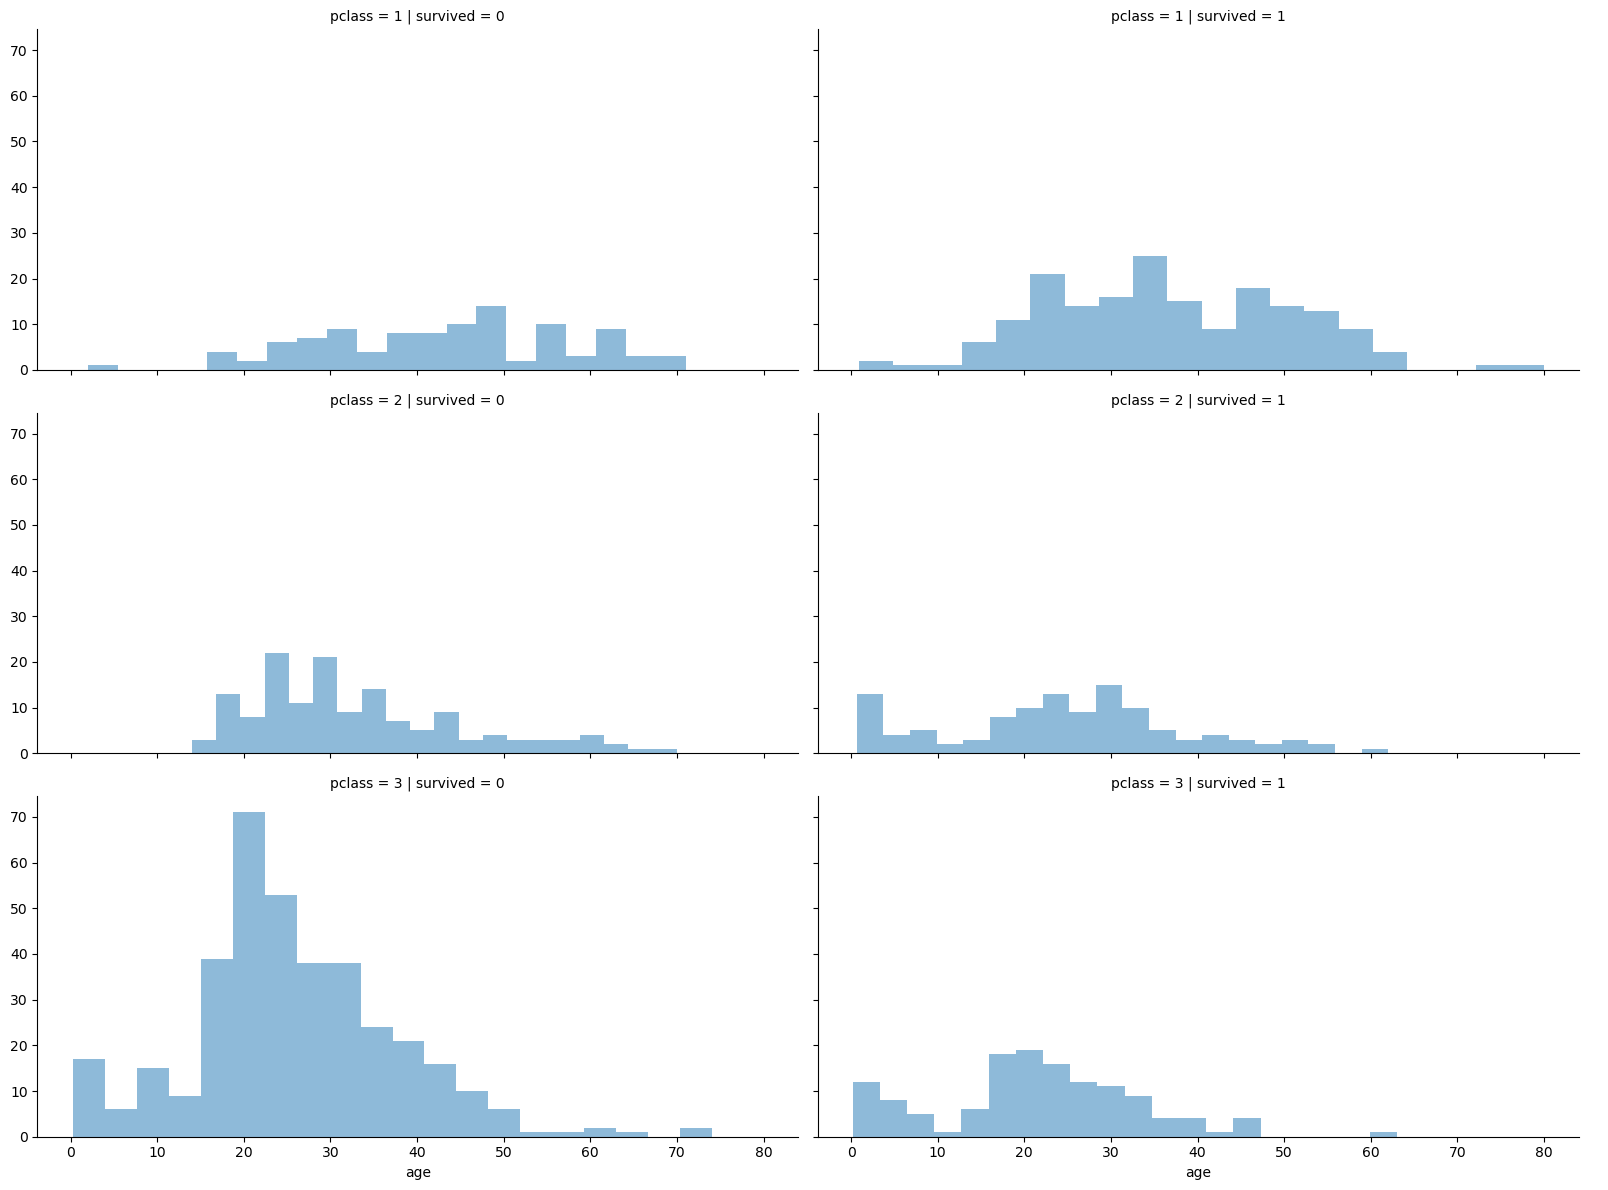

In [11]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist,'age',alpha=0.5,bins=20)
grid.add_legend()

In [13]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                            include_lowest=True,
                            labels= ['baby','teen','young','adult','old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


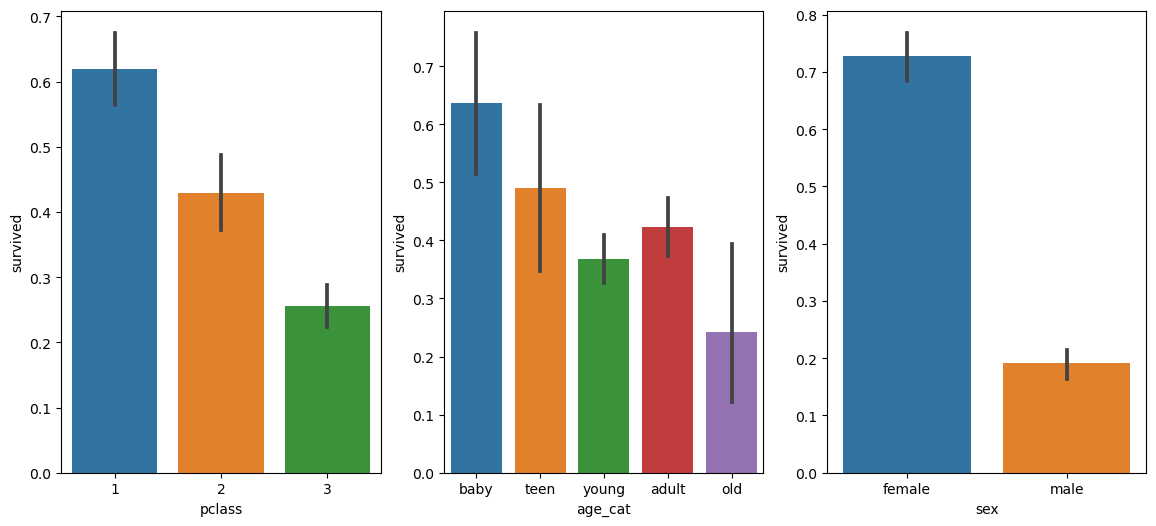

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.barplot(x='pclass',y='survived', data=titanic)

plt.subplot(132)
sns.barplot(x='age_cat',y='survived', data=titanic)

plt.subplot(133)
sns.barplot(x='sex',y='survived', data=titanic)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11184\2836349329.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_11184\2836349329.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_11184\2836349329.py:10: UserWarning:



`distplot` is a

Text(0.5, 1.0, 'Male')

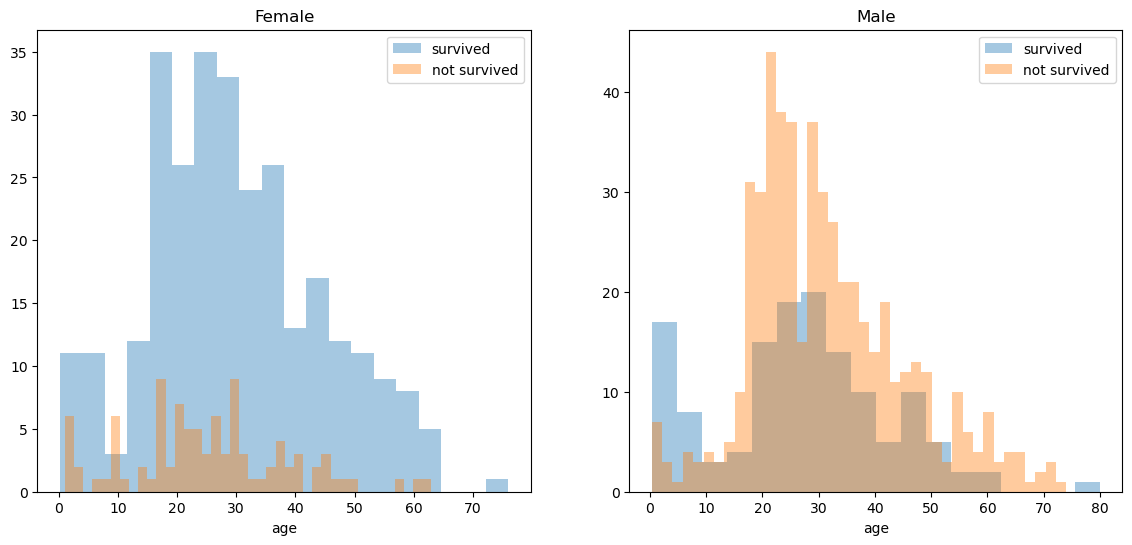

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.distplot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins=40, label='not survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1]['age'], bins=18, label='survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['survived']==0]['age'], bins=40, label='not survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')

In [26]:
import re 

title = []
for idx,dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [27]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [30]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [31]:
titanic['title'] = titanic['title'].replace('Mlle','Miss')
titanic['title'] = titanic['title'].replace('Ms','Miss')
titanic['title'] = titanic['title'].replace('Mme','Mrs')

Rare_f = ['Dona','Lady','the Countess']
Rare_m = ['Capt','Col','Don','Major','Rev','Sir','Dr','Master','Jonkheer']

In [32]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each,'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each,'Rare_m')

In [34]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [35]:
titanic[['title','survived']].groupby(['title'],as_index= False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

LabelEncoder()

In [39]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 160.1+ KB


In [42]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


In [43]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age', 'sibsp', 'parch','fare','gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=1234)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=1234)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [47]:
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


In [50]:
# [['pclass','age', 'sibsp', 'parch','fare','gender']]
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Dicaprio : ',dt.predict_proba(dicaprio)[0,1])

Dicaprio :  0.3055555555555556


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [52]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet : ',dt.predict_proba(winslet)[0,1])

Winslet :  0.8571428571428571


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

